<p><b>
    UFRN<br>
    Brain Institute<br>
    Computational Neurophysiology Lab<br>
    </b></p>
<p><i>Rodrigo Santiago</i></p>
<p> Natal, 2021 </p>
<br>
<br>
<p>DIM0872 — Machine Learning</p>

<h1>Check Point 4 — Unsupervised Models</h1>

<p>Python version:</p>

In [1]:
import sys
print(sys.version)

3.6.13 (default, Feb 20 2021, 21:42:50) 
[GCC 5.4.0 20160609]


<p>Versions of scientific modules:</p>

In [2]:
!pip3 freeze | grep numpy
!pip3 freeze | grep scipy
!pip3 freeze | grep scikit-learn

numpy==1.18.2
scipy==1.4.1
scikit-learn==0.22.2.post1


<h2>Loading modules and functions</h2>

In [3]:
import numpy as np
import pickle
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, adjusted_rand_score
from scipy.stats import sem, iqr, shapiro
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Loading database</h2>

In [4]:
BaseOriginal          = pickle.load(open("BaseOriginal.txt","rb"))
BaseReduzida1         = pickle.load(open("BaseReduzida1.txt","rb"))
BaseReduzida2         = pickle.load(open("BaseReduzida2.txt","rb"))
BaseReduzida3         = pickle.load(open("BaseReduzida3.txt","rb"))
BaseOriginal_classes  = pickle.load(open("BaseOriginal_classes.txt","rb"))
BaseReduzida1_classes = pickle.load(open("BaseReduzida1_classes.txt","rb"))
BaseReduzida2_classes = pickle.load(open("BaseReduzida2_classes.txt","rb"))
BaseReduzida3_classes = pickle.load(open("BaseReduzida3_classes.txt","rb"))

<h2>K-Means</h2>

<h3>Functions</h3>

In [5]:
def kMeans_analysis(X,y,n_clusters,seeds):
    
    kMeans_labels = np.empty((len(n_clusters),len(seeds),len(X))) # matrix with cluters' labels
    db_scores     = np.empty((len(n_clusters),len(seeds))) # matrix with DB indexes
    cr_scores     = np.empty((len(n_clusters),len(seeds))) # matrix with CR indexes

    for nc in n_clusters:
        for rs in seeds:
            kmeans = KMeans(n_clusters=nc, random_state=rs).fit(X)
            kMeans_labels[nc-2,rs] = kmeans.labels_
            db_scores[nc-2,rs] = davies_bouldin_score(X, kmeans.labels_)
            cr_scores[nc-2,rs] = adjusted_rand_score(y, kmeans.labels_)

    return kMeans_labels,db_scores,cr_scores

In [6]:
def smallClusters(kMeans_labels,n_clusters,seeds,min_inst_per_cluster):

    small_clusters = []

    for nc in range(len(n_clusters)):
        for rs in seeds:
            n_instances_per_cluster = np.unique(kMeans_labels[nc,rs],return_counts=True)[1]
            if any(n_instances_per_cluster < min_inst_per_cluster):
                small_clusters.append([nc+2,rs])
                
    return small_clusters

In [7]:
def plot_kMeans_indexes(titles,n_clusters,db_scores,cr_scores,k_valid_clusters):
    
    fig, axs = plt.subplots(2, 2, figsize=(23,15))
    axes = [axs[0,0],axs[0,1],axs[1,0],axs[1,1]]
    
    for i in range(4):
        
        color = 'tab:red'
        db_mean = np.mean(db_scores[i],axis=1)
        db_std  = np.std(db_scores[i],axis=1)
        axes[i].errorbar(n_clusters,db_mean,db_std,capsize=3,fmt='-o',color=color)
        axes[i].plot(np.argmin(db_mean)+2,np.min(db_mean),marker='*',markersize=20,color=color)
        axes[i].plot(np.argmin(db_mean[k_valid_clusters[i]-2])+2,np.min(db_mean[k_valid_clusters[i]-2]),
                     marker='o',markersize=30,fillstyle='none',color=color)
        axes[i].tick_params(axis='y',labelcolor=color,labelsize=15)
        axes[i].tick_params(axis='x',labelsize=15)
        axes[i].set_xticks(n_clusters)
        axes[i].set_xlabel('k',size=16)
        axes[i].set_ylabel('DB index',size=16,color=color)
        axes[i].set_title(titles[i],fontsize=17)
#         axes[i].xaxis.grid(True)

        color = 'tab:blue'
        ax = axes[i].twinx()
        cr_mean = np.mean(cr_scores[i],axis=1)
        cr_std  = np.std(cr_scores[i],axis=1)
        ax.errorbar(n_clusters,cr_mean,cr_std,capsize=3,fmt='-o',color=color)
        ax.plot(np.argmax(cr_mean)+2,np.max(cr_mean),marker='*',markersize=20,color=color)
        ax.plot(np.argmax(cr_mean[k_valid_clusters[i]-2])+2,np.max(cr_mean[k_valid_clusters[i]-2]),
                marker='o',markersize=30,fillstyle='none',color=color)
        ax.tick_params(axis='y',labelcolor=color,labelsize=15)
        ax.set_ylabel('CR index',size=16,color=color);

<h3>DB and CR indexes</h3>

<h4>Parameters</h4>

In [8]:
n_clusters = np.arange(2,11) # number of clusters
seeds      = np.arange(30)   # seeds (random states)

<h4>Original Base</h4>

In [9]:
X = BaseOriginal
y = BaseOriginal_classes

kMeans_labels_orig,db_scores_orig,cr_scores_orig = kMeans_analysis(X,y,n_clusters,seeds)

<h4>Reduced Base 1</h4>

In [10]:
X = BaseReduzida1
y = BaseReduzida1_classes

kMeans_labels_red1,db_scores_red1,cr_scores_red1 = kMeans_analysis(X,y,n_clusters,seeds)

<h4>Reduced Base 2</h4>

In [11]:
X = BaseReduzida2
y = BaseReduzida2_classes

kMeans_labels_red2,db_scores_red2,cr_scores_red2 = kMeans_analysis(X,y,n_clusters,seeds)

<h4>Reduced Base 3</h4>

In [12]:
X = BaseReduzida3
y = BaseReduzida3_classes

kMeans_labels_red3,db_scores_red3,cr_scores_red3 = kMeans_analysis(X,y,n_clusters,seeds)

<h3>Arragement validation from the minimum number of instances per cluster</h3>

<h4>Minimum amount of instances per cluster</h4>

In [13]:
min_inst_per_cluster = 3

<h4>Original Base</h4>

<p>k-values associated with small clusters:</p>

In [14]:
# all k and seed values associated with small clusters
small_clusters_orig = smallClusters(kMeans_labels_orig,n_clusters,seeds,min_inst_per_cluster)

# k values associated with small clusters
if small_clusters_orig:
    k_small_clusters_orig = np.unique(np.array(small_clusters_orig)[:,0],return_counts=True)[0]
else:
    k_small_clusters_orig = []
k_small_clusters_orig

array([ 7,  8,  9, 10])

<p>k-values associated with valid clusters:</p>

In [15]:
k_valid_clusters_orig = np.setdiff1d(n_clusters,k_small_clusters_orig)
k_valid_clusters_orig

array([2, 3, 4, 5, 6])

<h4>Reduced Base 1</h4>

<p>k-values associated with small clusters:</p>

In [16]:
# all k and seed values associated with small clusters
small_clusters_red1 = smallClusters(kMeans_labels_red1,n_clusters,seeds,min_inst_per_cluster)

# k values associated with small clusters
if small_clusters_red1:
    k_small_clusters_red1 = np.unique(np.array(small_clusters_red1)[:,0],return_counts=True)[0]
else:
    k_small_clusters_red1 = []
k_small_clusters_red1

array([ 5,  6,  7,  8,  9, 10])

<p>k-values associated with valid clusters:</p>

In [17]:
k_valid_clusters_red1 = np.setdiff1d(n_clusters,k_small_clusters_red1)
k_valid_clusters_red1

array([2, 3, 4])

<h4>Reduced Base 2</h4>

<p>k-values associated with small clusters:</p>

In [18]:
# all k and seed values associated with small clusters
small_clusters_red2 = smallClusters(kMeans_labels_red2,n_clusters,seeds,min_inst_per_cluster)

# k values associated with small clusters
if small_clusters_red2:
    k_small_clusters_red2 = np.unique(np.array(small_clusters_red2)[:,0],return_counts=True)[0]
else:
    k_small_clusters_red2 = []
k_small_clusters_red2

array([ 7,  8,  9, 10])

<p>k-values associated with valid clusters:</p>

In [19]:
k_valid_clusters_red2 = np.setdiff1d(n_clusters,k_small_clusters_red2)
k_valid_clusters_red2

array([2, 3, 4, 5, 6])

<h4>Reduced Base 3</h4>

<p>k-values associated with small clusters:</p>

In [20]:
# all k and seed values associated with small clusters
small_clusters_red3 = smallClusters(kMeans_labels_red3,n_clusters,seeds,min_inst_per_cluster)

# k values associated with small clusters
k_small_clusters_red3 = np.unique(np.array(small_clusters_red3)[:,0],return_counts=True)[0]
k_small_clusters_red3

array([ 7,  8,  9, 10])

<p>k-values associated with valid clusters:</p>

In [21]:
k_valid_clusters_red3 = np.setdiff1d(n_clusters,k_small_clusters_red3)
k_valid_clusters_red3

array([2, 3, 4, 5, 6])

<h3>Compilation</h3>

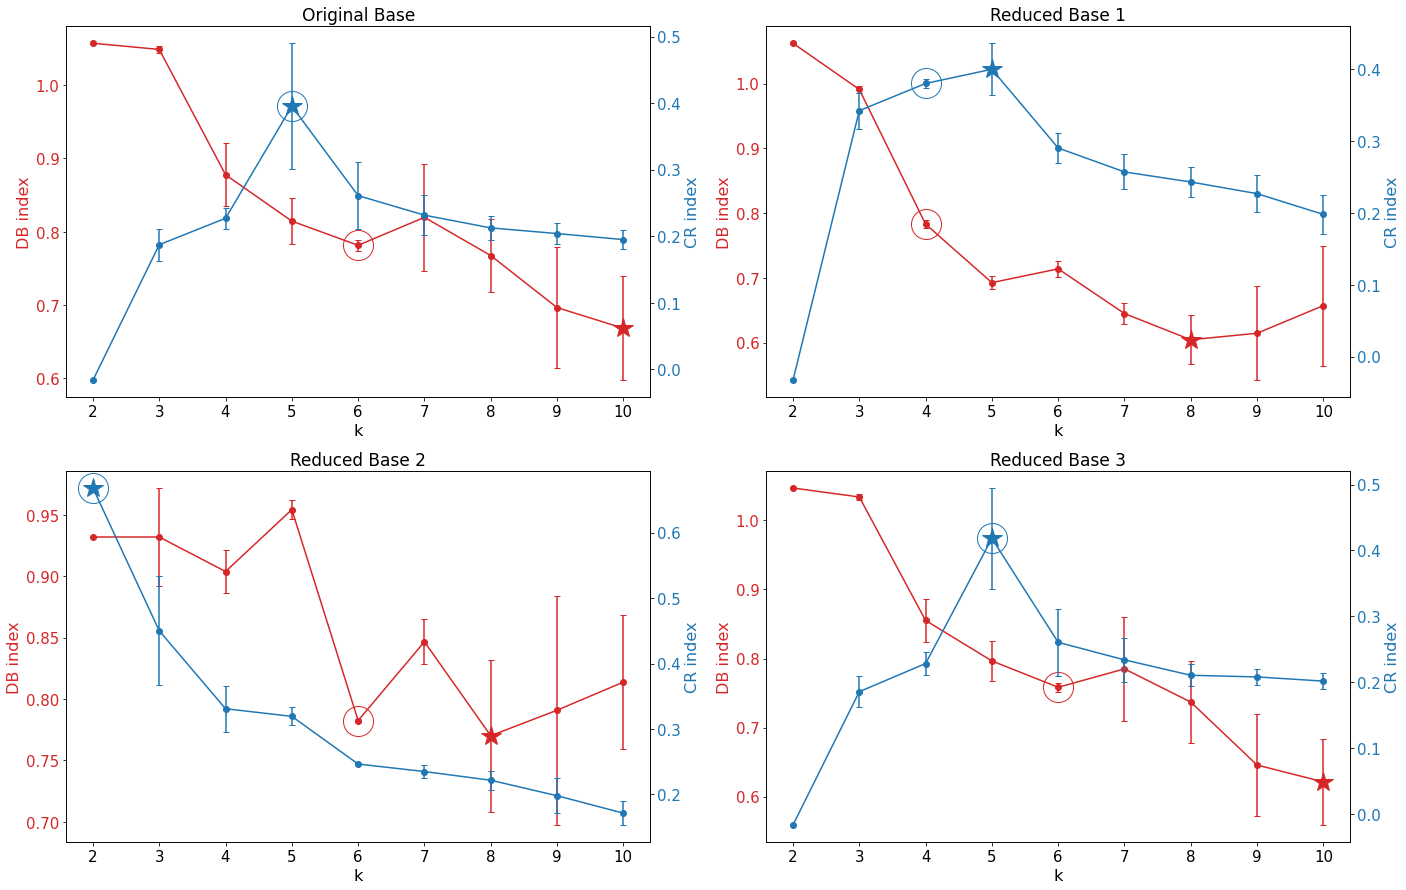

In [22]:
titles = ['Original Base','Reduced Base 1','Reduced Base 2','Reduced Base 3']
db_scores = [db_scores_orig,db_scores_red1,db_scores_red2,db_scores_red3]
cr_scores = [cr_scores_orig,cr_scores_red1,cr_scores_red2,cr_scores_red3]
k_valid_clusters = [k_valid_clusters_orig,k_valid_clusters_red1,k_valid_clusters_red2,k_valid_clusters_red3]
plot_kMeans_indexes(titles,n_clusters,db_scores,cr_scores,k_valid_clusters)

<h4>Plot for Reduced Base 3 alone</h4>

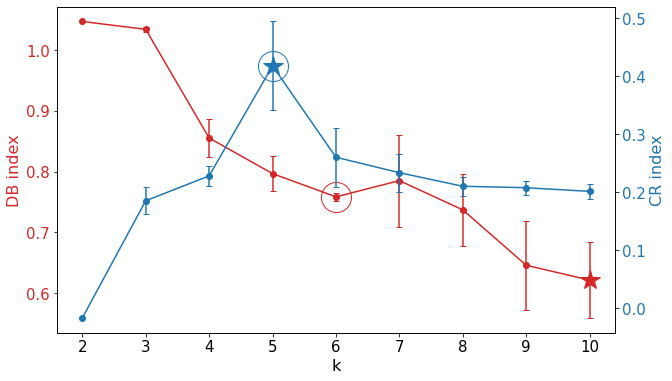

In [23]:
fig, axs = plt.subplots(figsize=(10,6))

color = 'tab:red'
db_mean = np.mean(db_scores_red3,axis=1)
db_std  = np.std(db_scores_red3,axis=1)
axs.errorbar(n_clusters,db_mean,db_std,capsize=3,fmt='-o',color=color)
axs.plot(np.argmin(db_mean)+2,np.min(db_mean),marker='*',markersize=20,color=color)
axs.plot(np.argmin(db_mean[k_valid_clusters_red3-2])+2,np.min(db_mean[k_valid_clusters_red3-2]),
             marker='o',markersize=30,fillstyle='none',color=color)
axs.tick_params(axis='y',labelcolor=color,labelsize=15)
axs.tick_params(axis='x',labelsize=15)
axs.set_xticks(n_clusters)
axs.set_xlabel('k',size=16)
axs.set_ylabel('DB index',size=16,color=color)

color = 'tab:blue'
ax = axs.twinx()
cr_mean = np.mean(cr_scores_red3,axis=1)
cr_std  = np.std(cr_scores_red3,axis=1)
ax.errorbar(n_clusters,cr_mean,cr_std,capsize=3,fmt='-o',color=color)
ax.plot(np.argmax(cr_mean)+2,np.max(cr_mean),marker='*',markersize=20,color=color)
ax.plot(np.argmax(cr_mean[k_valid_clusters_red3-2])+2,np.max(cr_mean[k_valid_clusters_red3-2]),
        marker='o',markersize=30,fillstyle='none',color=color)
ax.tick_params(axis='y',labelcolor=color,labelsize=15)
ax.set_ylabel('CR index',size=16,color=color);

<p>Best DB score:</p>

In [24]:
np.argmin(db_mean[k_valid_clusters_red3-2])+2,np.round(np.min(db_mean[k_valid_clusters_red3-2]),2)

(6, 0.76)

<p>Best CR score:</p>

In [25]:
np.argmax(cr_mean[k_valid_clusters_red3-2])+2,np.round(np.max(cr_mean[k_valid_clusters_red3-2]),2)

(5, 0.42)

<h2>Agglomerative Clustering</h2>

<h3>Functions</h3>

In [26]:
def AgglomAnalysis(X,y,n_clusters,linkage):
    agg_labels = np.empty((len(n_clusters),len(X))) # matrix with cluters' labels
    db_scores  = np.empty(len(n_clusters))          # matrix with DB indexes
    cr_scores  = np.empty(len(n_clusters))          # matrix with CR indexes

    for nc in n_clusters:
        clustering = AgglomerativeClustering(n_clusters=nc,linkage=linkage).fit(X)
        agg_labels[nc-2] = clustering.labels_
        db_scores[nc-2] = davies_bouldin_score(X, clustering.labels_)
        cr_scores[nc-2] = adjusted_rand_score(y, clustering.labels_)
    
    return agg_labels,db_scores,cr_scores

In [27]:
def smallClustersAgg(agg_labels,n_clusters,min_inst_per_cluster):

    small_clusters = []

    for nc in range(len(n_clusters)):
            n_instances_per_cluster = np.unique(agg_labels[nc],return_counts=True)[1]
            if any(n_instances_per_cluster < min_inst_per_cluster):
                small_clusters.append([nc+2])
                
    return small_clusters

In [28]:
def validClustersAgg(agg_labels,n_clusters,min_inst_per_cluster):
    
    # number of clusters (k) that were identified as small
    small_clusters_agg = smallClustersAgg(agg_labels,n_clusters,min_inst_per_cluster)

    # k-values associated with small clusters
    if small_clusters_agg:
        n_small_clusters_agg = np.unique(np.array(small_clusters_agg)[0],return_counts=True)[0]
    else:
        n_small_clusters_agg = []
    n_valid_clusters_agg = np.setdiff1d(n_clusters,n_small_clusters_agg)
    
    return n_valid_clusters_agg

In [29]:
def plotAggIndexes(titles,n_clusters,db_scores,cr_scores,nc_valid_clusters):
    
    fig, axs = plt.subplots(2, 2, figsize=(22,14))
    axes = [axs[0,0],axs[0,1],axs[1,0],axs[1,1]]
    
    for i in range(4):
        
        color = 'tab:red'
        axes[i].plot(n_clusters,db_scores[i],'-o',color=color)
        axes[i].plot(np.argmin(db_scores[i])+2,np.min(db_scores[i]),marker='*',markersize=20,color=color)
        axes[i].plot(nc_valid_clusters[i][np.argmin(db_scores[i][nc_valid_clusters[i]-2])],
                     np.min(db_scores[i][nc_valid_clusters[i]-2]),
                     marker='o',markersize=30,fillstyle='none',color=color)
        axes[i].tick_params(axis='y',labelcolor=color,labelsize=15)
        axes[i].tick_params(axis='x',labelsize=15)
        axes[i].set_xticks(n_clusters)
        axes[i].set_xlabel('number of clusters',size=16)
        axes[i].set_ylabel('DB index',size=16,color=color)
        axes[i].set_title(titles[i],fontsize=17)
#         axes[i].xaxis.grid(True)

        color = 'tab:blue'
        ax = axes[i].twinx()
        ax.plot(n_clusters,cr_scores[i],'-o',color=color)
        ax.plot(np.argmax(cr_scores[i])+2,np.max(cr_scores[i]),marker='*',markersize=20,color=color)
        ax.plot(nc_valid_clusters[i][np.argmax(cr_scores[i][nc_valid_clusters[i]-2])],
                np.max(cr_scores[i][nc_valid_clusters[i]-2]),
                marker='o',markersize=30,fillstyle='none',color=color)
        ax.tick_params(axis='y',labelcolor=color,labelsize=15)
        ax.set_ylabel('CR index',size=16,color=color);

<h3>DB and CR indexes</h3>

<h4>Parameters</h4>

In [30]:
n_clusters = np.arange(2,11) # number of clusters
titles = ['Single Linkage','Complete Linkage','Average Linkage','Ward Linkage']

<h4>Original Base</h4>

In [31]:
X = BaseOriginal
y = BaseOriginal_classes

agg_labels_simp_orig,db_scores_simp_orig,cr_scores_simp_orig = AgglomAnalysis(X,y,n_clusters,'single')
agg_labels_comp_orig,db_scores_comp_orig,cr_scores_comp_orig = AgglomAnalysis(X,y,n_clusters,'complete')
agg_labels_aver_orig,db_scores_aver_orig,cr_scores_aver_orig = AgglomAnalysis(X,y,n_clusters,'average')
agg_labels_ward_orig,db_scores_ward_orig,cr_scores_ward_orig = AgglomAnalysis(X,y,n_clusters,'ward')

<h4>Reduced Base 1</h4>

In [32]:
X = BaseReduzida1
y = BaseReduzida1_classes

agg_labels_simp_red1,db_scores_simp_red1,cr_scores_simp_red1 = AgglomAnalysis(X,y,n_clusters,'single')
agg_labels_comp_red1,db_scores_comp_red1,cr_scores_comp_red1 = AgglomAnalysis(X,y,n_clusters,'complete')
agg_labels_aver_red1,db_scores_aver_red1,cr_scores_aver_red1 = AgglomAnalysis(X,y,n_clusters,'average')
agg_labels_ward_red1,db_scores_ward_red1,cr_scores_ward_red1 = AgglomAnalysis(X,y,n_clusters,'ward')

<h4>Reduced Base 2</h4>

In [33]:
X = BaseReduzida2
y = BaseReduzida2_classes

agg_labels_simp_red2,db_scores_simp_red2,cr_scores_simp_red2 = AgglomAnalysis(X,y,n_clusters,'single')
agg_labels_comp_red2,db_scores_comp_red2,cr_scores_comp_red2 = AgglomAnalysis(X,y,n_clusters,'complete')
agg_labels_aver_red2,db_scores_aver_red2,cr_scores_aver_red2 = AgglomAnalysis(X,y,n_clusters,'average')
agg_labels_ward_red2,db_scores_ward_red2,cr_scores_ward_red2 = AgglomAnalysis(X,y,n_clusters,'ward')

<h4>Reduced Base 3</h4>

In [34]:
X = BaseReduzida3
y = BaseReduzida3_classes

agg_labels_simp_red3,db_scores_simp_red3,cr_scores_simp_red3 = AgglomAnalysis(X,y,n_clusters,'single')
agg_labels_comp_red3,db_scores_comp_red3,cr_scores_comp_red3 = AgglomAnalysis(X,y,n_clusters,'complete')
agg_labels_aver_red3,db_scores_aver_red3,cr_scores_aver_red3 = AgglomAnalysis(X,y,n_clusters,'average')
agg_labels_ward_red3,db_scores_ward_red3,cr_scores_ward_red3 = AgglomAnalysis(X,y,n_clusters,'ward')

<h3>Arragement validation from the minimum number of instances per cluster</h3>

<h4>Minimum amount of instances per cluster</h4>

In [35]:
min_inst_per_cluster = 3

<h4>Original Base</h4>

In [36]:
n_valid_clusters_agg_simp_orig = validClustersAgg(agg_labels_simp_orig,n_clusters,min_inst_per_cluster)
n_valid_clusters_agg_comp_orig = validClustersAgg(agg_labels_comp_orig,n_clusters,min_inst_per_cluster)
n_valid_clusters_agg_aver_orig = validClustersAgg(agg_labels_aver_orig,n_clusters,min_inst_per_cluster)
n_valid_clusters_agg_ward_orig = validClustersAgg(agg_labels_ward_orig,n_clusters,min_inst_per_cluster)

<h4>Reduced Base 1</h4>

In [37]:
n_valid_clusters_agg_simp_red1 = validClustersAgg(agg_labels_simp_red1,n_clusters,min_inst_per_cluster)
n_valid_clusters_agg_comp_red1 = validClustersAgg(agg_labels_comp_red1,n_clusters,min_inst_per_cluster)
n_valid_clusters_agg_aver_red1 = validClustersAgg(agg_labels_aver_red1,n_clusters,min_inst_per_cluster)
n_valid_clusters_agg_ward_red1 = validClustersAgg(agg_labels_ward_red1,n_clusters,min_inst_per_cluster)

<h4>Reduced Base 2</h4>

In [38]:
n_valid_clusters_agg_simp_red2 = validClustersAgg(agg_labels_simp_red2,n_clusters,min_inst_per_cluster)
n_valid_clusters_agg_comp_red2 = validClustersAgg(agg_labels_comp_red2,n_clusters,min_inst_per_cluster)
n_valid_clusters_agg_aver_red2 = validClustersAgg(agg_labels_aver_red2,n_clusters,min_inst_per_cluster)
n_valid_clusters_agg_ward_red2 = validClustersAgg(agg_labels_ward_red2,n_clusters,min_inst_per_cluster)

<h4>Reduced Base 3</h4>

In [39]:
n_valid_clusters_agg_simp_red3 = validClustersAgg(agg_labels_simp_red3,n_clusters,min_inst_per_cluster)
n_valid_clusters_agg_comp_red3 = validClustersAgg(agg_labels_comp_red3,n_clusters,min_inst_per_cluster)
n_valid_clusters_agg_aver_red3 = validClustersAgg(agg_labels_aver_red3,n_clusters,min_inst_per_cluster)
n_valid_clusters_agg_ward_red3 = validClustersAgg(agg_labels_ward_red3,n_clusters,min_inst_per_cluster)

<h3>Compilation</h3>

<h4>Original Base</h4>

In [40]:
db_scores = [db_scores_simp_orig,db_scores_comp_orig,db_scores_aver_orig,db_scores_ward_orig]
cr_scores = [cr_scores_simp_orig,cr_scores_comp_orig,cr_scores_aver_orig,cr_scores_ward_orig]

nc_valid_clusters = [n_valid_clusters_agg_simp_orig,n_valid_clusters_agg_comp_orig,
                     n_valid_clusters_agg_aver_orig,n_valid_clusters_agg_aver_orig]

nc_valid_clusters

[array([ 3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 2,  3,  4,  5,  6,  8,  9, 10]),
 array([ 2,  3,  4,  5,  7,  8,  9, 10]),
 array([ 2,  3,  4,  5,  7,  8,  9, 10])]

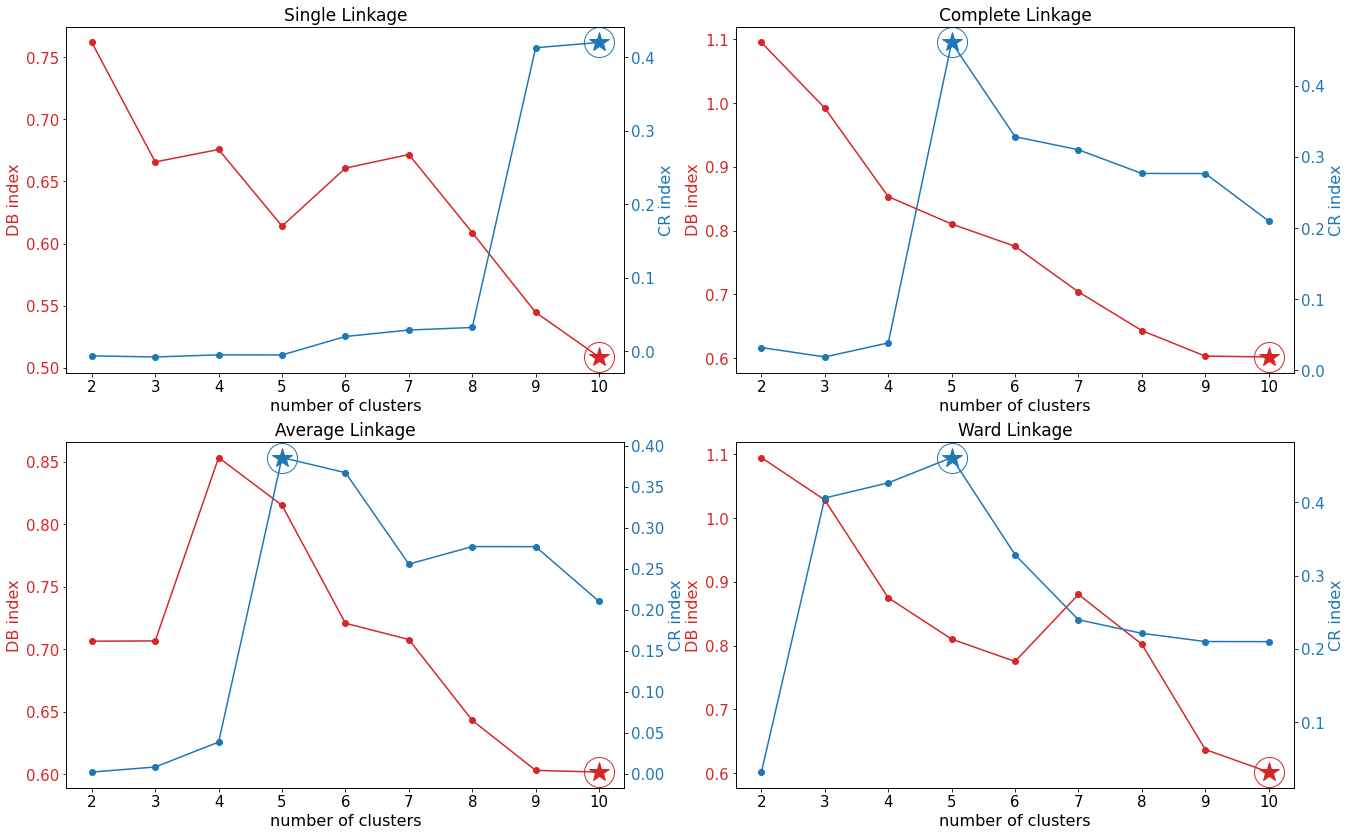

In [41]:
plotAggIndexes(titles,n_clusters,db_scores,cr_scores,nc_valid_clusters)

<h4>Reduced Base 1</h4>

In [42]:
db_scores = [db_scores_simp_red1,db_scores_comp_red1,db_scores_aver_red1,db_scores_ward_red1]
cr_scores = [cr_scores_simp_red1,cr_scores_comp_red1,cr_scores_aver_red1,cr_scores_ward_red1]

nc_valid_clusters = [n_valid_clusters_agg_simp_red1,n_valid_clusters_agg_comp_red1,
                     n_valid_clusters_agg_aver_red1,n_valid_clusters_agg_aver_red1]

nc_valid_clusters

[array([ 3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 2,  4,  5,  6,  7,  8,  9, 10]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 3,  4,  5,  6,  7,  8,  9, 10])]

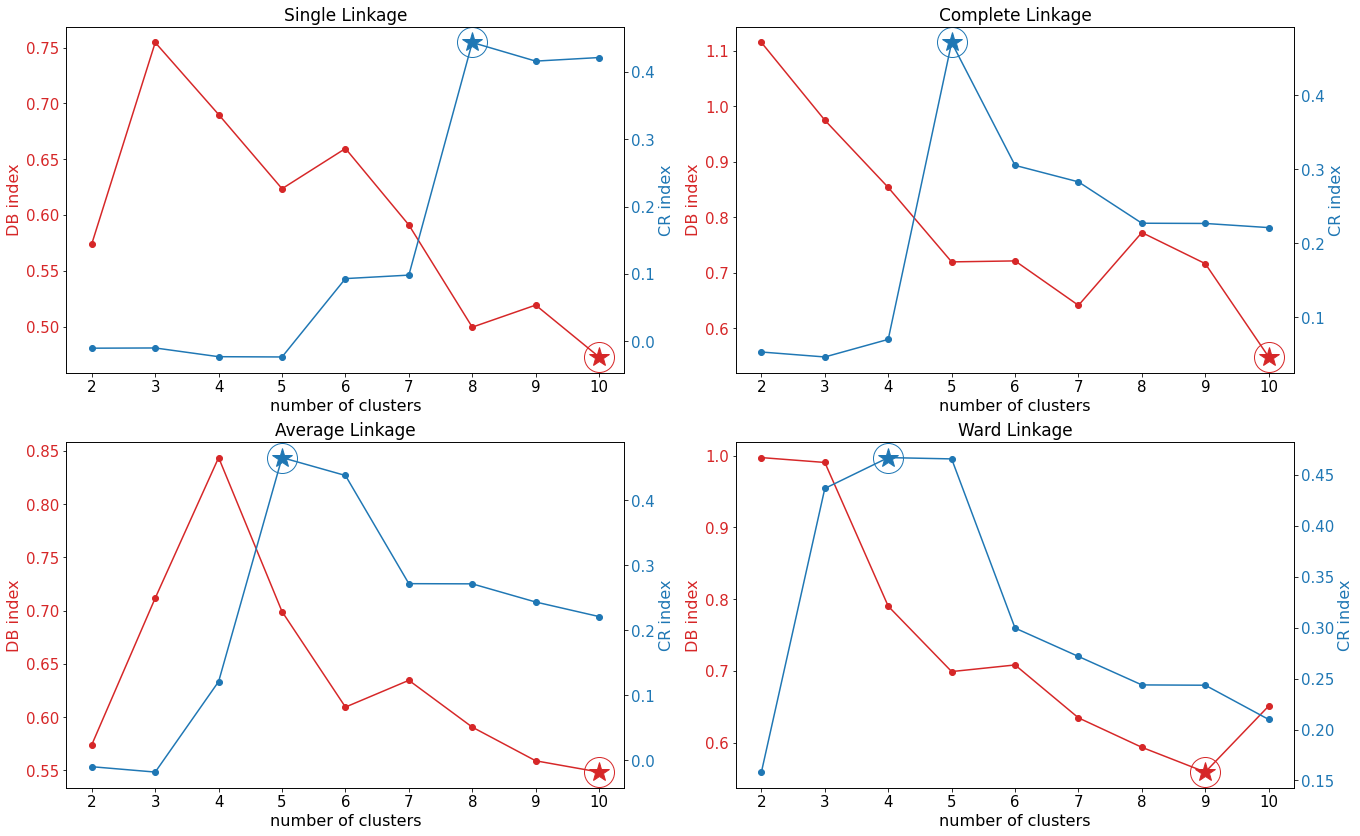

In [43]:
plotAggIndexes(titles,n_clusters,db_scores,cr_scores,nc_valid_clusters)

<h4>Reduced Base 2</h4>

In [44]:
db_scores = [db_scores_simp_red2,db_scores_comp_red2,db_scores_aver_red2,db_scores_ward_red2]
cr_scores = [cr_scores_simp_red2,cr_scores_comp_red2,cr_scores_aver_red2,cr_scores_ward_red2]

nc_valid_clusters = [n_valid_clusters_agg_simp_red2,n_valid_clusters_agg_comp_red2,
                     n_valid_clusters_agg_aver_red2,n_valid_clusters_agg_aver_red2]

nc_valid_clusters

[array([ 2,  4,  5,  6,  7,  8,  9, 10]),
 array([ 2,  3,  4,  5,  6,  7,  9, 10]),
 array([ 2,  3,  4,  5,  7,  8,  9, 10]),
 array([ 2,  3,  4,  5,  7,  8,  9, 10])]

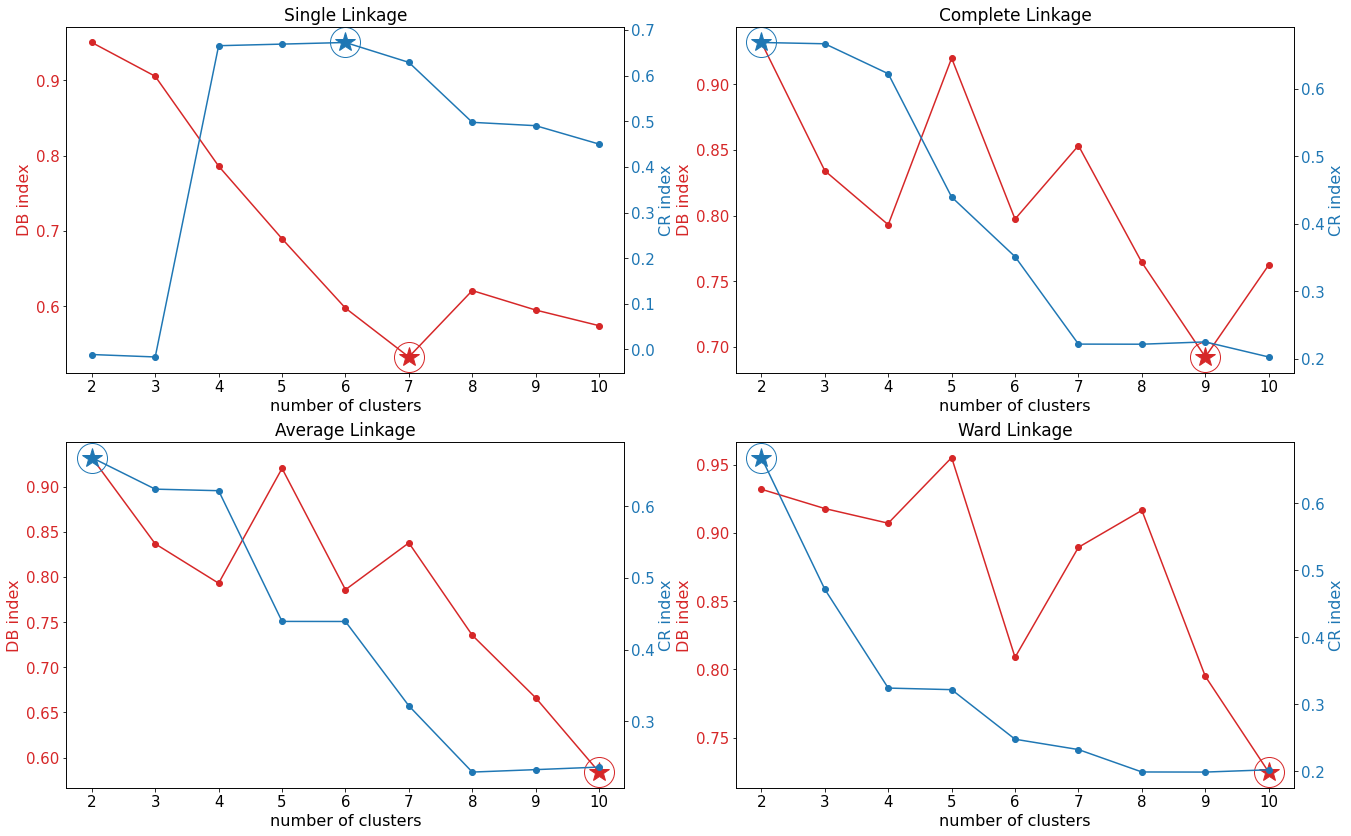

In [45]:
plotAggIndexes(titles,n_clusters,db_scores,cr_scores,nc_valid_clusters)

<h4>Reduced Base 3</h4>

In [46]:
db_scores = [db_scores_simp_red3,db_scores_comp_red3,db_scores_aver_red3,db_scores_ward_red3]
cr_scores = [cr_scores_simp_red3,cr_scores_comp_red3,cr_scores_aver_red3,cr_scores_ward_red3]

nc_valid_clusters = [n_valid_clusters_agg_simp_red3,n_valid_clusters_agg_comp_red3,
                     n_valid_clusters_agg_aver_red3,n_valid_clusters_agg_aver_red3]

nc_valid_clusters

[array([ 3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 2,  3,  4,  5,  6,  8,  9, 10]),
 array([ 2,  3,  4,  5,  7,  8,  9, 10]),
 array([ 2,  3,  4,  5,  7,  8,  9, 10])]

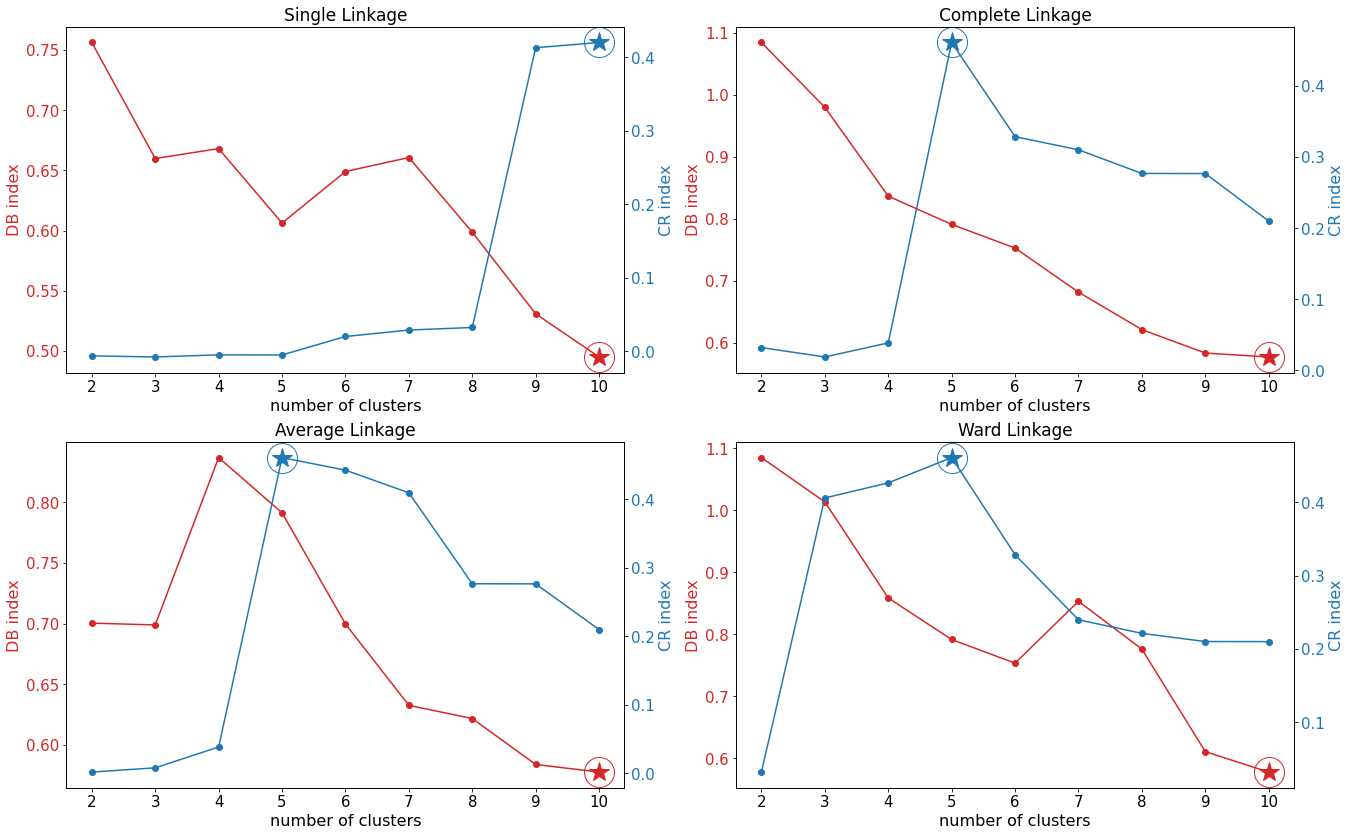

In [47]:
plotAggIndexes(titles,n_clusters,db_scores,cr_scores,nc_valid_clusters)

<p>Best DB scores:</p>

In [48]:
print(n_valid_clusters_agg_simp_red3[np.argmin(db_scores_simp_red3[n_valid_clusters_agg_simp_red3-2])],
      np.round(np.min(db_scores_simp_red3[n_valid_clusters_agg_simp_red3-2]),2))

10 0.5


In [49]:
print(n_valid_clusters_agg_comp_red3[np.argmin(db_scores_comp_red3[n_valid_clusters_agg_comp_red3-2])],
      np.round(np.min(db_scores_comp_red3[n_valid_clusters_agg_comp_red3-2]),2))

10 0.58


In [50]:
print(n_valid_clusters_agg_aver_red3[np.argmin(db_scores_aver_red3[n_valid_clusters_agg_aver_red3-2])],
      np.round(np.min(db_scores_aver_red3[n_valid_clusters_agg_aver_red3-2]),2))

10 0.58


In [51]:
print(n_valid_clusters_agg_ward_red3[np.argmin(db_scores_ward_red3[n_valid_clusters_agg_ward_red3-2])],
      np.round(np.min(db_scores_ward_red3[n_valid_clusters_agg_ward_red3-2]),2))

10 0.58


<p>Best CR scores:</p>

In [52]:
print(n_valid_clusters_agg_simp_red3[np.argmax(cr_scores_simp_red3[n_valid_clusters_agg_simp_red3-2])],
      np.round(np.max(cr_scores_simp_red3[n_valid_clusters_agg_simp_red3-2]),2))

10 0.42


In [53]:
print(n_valid_clusters_agg_comp_red3[np.argmax(cr_scores_comp_red3[n_valid_clusters_agg_comp_red3-2])],
      np.round(np.max(cr_scores_comp_red3[n_valid_clusters_agg_comp_red3-2]),2))

5 0.46


In [54]:
print(n_valid_clusters_agg_aver_red3[np.argmax(cr_scores_aver_red3[n_valid_clusters_agg_aver_red3-2])],
      np.round(np.max(cr_scores_aver_red3[n_valid_clusters_agg_aver_red3-2]),2))

5 0.46


In [55]:
print(n_valid_clusters_agg_ward_red3[np.argmax(cr_scores_ward_red3[n_valid_clusters_agg_ward_red3-2])],
      np.round(np.max(cr_scores_ward_red3[n_valid_clusters_agg_ward_red3-2]),2))

5 0.46
